In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

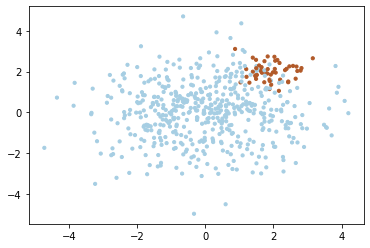

In [2]:
class_1 = 500
class_2 = 50
centers=[[0.0,0.0],[2.0,2.0]]
cluster_std = [1.5 , 0.5]
X, y = make_blobs(
    n_samples=[class_1,class_2]
    , centers=centers
    , cluster_std = cluster_std
)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,s=10)
plt.show()

In [3]:
#不设定class_weight
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)
#设定class_weight
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)
#给两个模型分别打分看看，这个分数是accuracy准确度
print(clf.score(X,y))
print(wclf.score(X,y))

0.9309090909090909
0.9


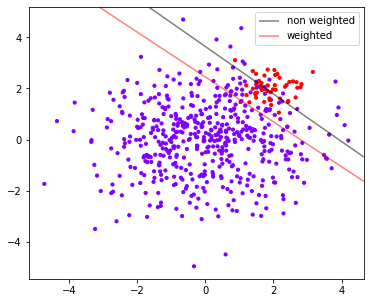

In [4]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
loc="upper right")
plt.show()

In [5]:
clf.decision_function(xy).shape

(900,)

In [6]:
print(a.collections) #调用这个等高线对象中画的所有线，返回一个惰性对象

<a list of 1 mcoll.LineCollection objects>


In [7]:
#用[*]把它打开试试看
print([*a.collections]) #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表

In [8]:
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]
#plt.legend([对象列表],[图例列表],loc)
#只要对象列表和图例列表相对应，就可以显示出图例

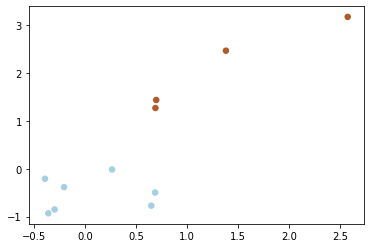

In [9]:
class_1 = 7
class_2 = 4
centers = [[0.0,0.0],[1.0,1.0]]
cluster_std = [0.5,1]
X,y = make_blobs(
    n_samples=[class_1,class_2]
    ,centers=centers
    ,cluster_std=cluster_std
)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,s=30)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [11]:
clf_lo = LogisticRegression().fit(X,y)
prob = clf_lo.predict_proba(X)
prob = pd.DataFrame(prob)
prob.columns = ['0','1']
prob

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,0.051653,0.948347
1,0.014597,0.985403
2,0.250516,0.749484
3,0.897782,0.102218
4,0.210121,0.789879
5,0.800948,0.199052
6,0.782452,0.217548
7,0.681006,0.318994
8,0.885572,0.114428
9,0.770558,0.229442


In [12]:
for i in range(prob.shape[0]):
    if prob.loc[i,'1'] > 0.5:
        prob.loc[i,'pred'] = 1
    else:
        prob.loc[i,'pred'] = 0
# 上面的一行就能写完.
prob['y_true'] = y
prob = prob.sort_values(by='1',ascending=False)
prob

,0,1,pred,y_true
1,0.014597,0.985403,1.0,1
0,0.051653,0.948347,1.0,1
4,0.210121,0.789879,1.0,1
2,0.250516,0.749484,1.0,1
7,0.681006,0.318994,0.0,0
9,0.770558,0.229442,0.0,0
6,0.782452,0.217548,0.0,0
5,0.800948,0.199052,0.0,0
10,0.840526,0.159474,0.0,0
8,0.885572,0.114428,0.0,0


In [13]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [14]:
confusion_matrix(
    prob.loc[:,'y_true']
    ,prob.loc[:,'pred']
    ,labels=[1,0])

array([[4, 0],
       [0, 7]])

In [15]:
precision_score(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0])

1.0

In [16]:
recall_score(prob.y_true,prob.pred,labels=[1,0])

1.0

In [17]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

prob

confusion_matrix(prob.y_true,prob.pred,labels=[1,0])

array([[4, 0],
       [0, 7]])

In [18]:
precision_score(prob.y_true,prob.pred,labels=[1,0])

1.0

In [19]:
recall_score(prob.y_true,prob.pred,labels=[1,0])

1.0

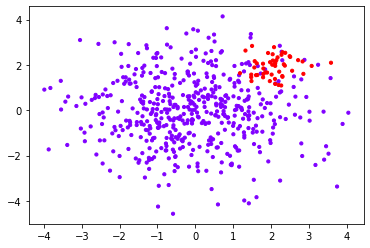

In [20]:
#使用最初的X和y，样本不均衡的这个模型
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
centers=centers,
cluster_std=clusters_std,
random_state=0, shuffle=False)
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类
plt.show()

In [21]:
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)

In [22]:
clf_proba.predict_proba(X)

array([[0.68201121, 0.31798879],
       [0.26513643, 0.73486357],
       [0.96033802, 0.03966198],
       ...,
       [0.15854092, 0.84145908],
       [0.35339367, 0.64660633],
       [0.31709972, 0.68290028]])

In [23]:
clf_proba.predict_proba(X).shape

(550, 2)

<Figure size 432x288 with 0 Axes>

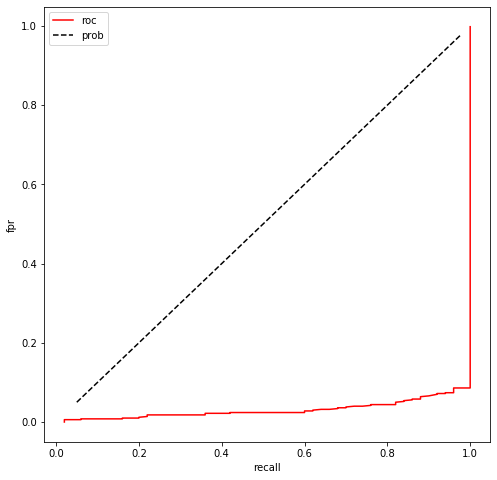

In [24]:
recall = []
FPR = []

probs = clf_proba.predict_proba(X)
prob_range = np.linspace(probs[:,1].min(),probs[:,1].max(),num=200,endpoint=False)

for i in prob_range:
    y_predict = np.zeros(X.shape[0])
    y_predict[probs[:,1] > i] = 1
    y_predict[probs[:,1] <= i] = 0
    cm = confusion_matrix(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort() # 正确率 
FPR.sort() # 多数类判断错误
plt.clf()
plt.figure(figsize=(8,8))
plt.plot(recall,FPR,c='red',label='roc')
plt.plot(prob_range+0.05,prob_range+0.05,c='black',linestyle='--',label='prob')
plt.xlabel('recall')
plt.ylabel('fpr')
plt.legend()
plt.show()

```
recall = 11 / 11 + 10
```
10代表着1被预测成0的数量
recall越大意味着10小,即判错假例的数量越小

```
fpr = 01 / 01 + 00
```

fpr意味着判断错正例的概率,越大判断错的越多

一个判错假例,一个判错正例.

现在我们就画出了ROC曲线了，那我们如何理解这条曲线呢？先来回忆一下，我们建立ROC曲线的根本目的是找寻Recall和FPR之间的平衡，让我们能够衡量模型在尽量捕捉少数类的时候，误伤多数类的情况会如何变化。横坐标是FPR，代表着模型将多数类判断错误的能力，纵坐标Recall，代表着模型捕捉少数类的能力，所以ROC曲线代表着，随着Recall的不断增加，FPR如何增加。我们希望随着Recall的不断提升，FPR增加得越慢越好，这说明我们可以尽量高效地捕捉出少数类，而不会将很多地多数类判断错误。所以，我们希望看到的图像是，纵坐标急速上升，横坐标缓慢增长，也就是在整个图像左上方的一条弧线。这代表模型的效果很不错，拥有较好的捕获少数类的能力

中间的虚线代表着，当recall增加 `1%` ，我们的FPR也增加 `1%`，也就是说，我们每捕捉出一个少数类，就会有一个多数类被判错，这种情况下，模型的效果就不好，这种模型捕获少数类的结果，会让许多多数类被误伤，从而增加我们的成本。ROC曲线通常都是凸型的。对于一条凸型ROC曲线来说，曲线越靠近左上角越好，越往下越糟糕，曲线如果在虚线的下方，则证明模型完全无法使用。但是它也有可能是一条凹形的ROC曲线。对于一条凹型ROC曲线来说，应该越靠近右下角越好，凹形曲线代表模型的预测结果与真实情况完全相反，那也不算非常糟糕，只要我们手动将模型的结果逆转，就可以得到一条左上方的弧线了。最糟糕的就是，无论曲线是凹形还是凸型，曲线位于图像中间，和虚线非常靠近，那我们拿它无能为力

好了，现在我们有了这条曲线，我们的确知道模型的效果还算是不错了。但依然非常摸棱两可，有没有具体的数字来帮助我们理解ROC曲线和模型的效果呢？的确存在，这个数字就叫做AUC面积，它代表了ROC曲线下方的面积，这个面积越大，代表ROC曲线越接近左上角，模型就越好。AUC面积的计算比较繁琐，因此，我们使用sklearn来帮助我们。接下来我们来看看，在sklearn当中，如何绘制我们的ROC曲线，找出我们的的AUC面积

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
from sklearn.metrics import roc_curve

`y_true` : 数组，形状 = [n_samples]，真实标签

`y_score` : 数组，形状 = [n_samples]，置信度分数，可以是正类样本的概率值，或置信度分数，或者`decision_function` : 返回的距离

`pos_label` : 整数或者字符串, 默认None，表示被认为是正类样本的类别

`sample_weight` : 形如 [n_samples]的类数组结构，可不填，表示样本的权重

`drop_intermediate` : 布尔值，默认True，如果设置为True，表示会舍弃一些ROC曲线上不显示的阈值点，这对于计算一个比较轻量的ROC曲线来说非常有用这个类以此返回：FPR，Recall以及阈值。

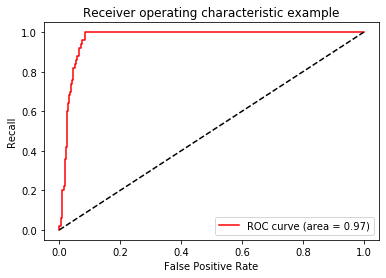

In [28]:
FPR, recall, thresholds = roc_curve(y,clf_proba.decision_function(X), pos_label=1)
auc = roc_auc_score(y,clf_proba.decision_function(X))
plt.figure()
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

如此就得到了我们的ROC曲线和AUC面积，可以看到，SVM在这个简单数据集上的效果还是非常好的。并且大家可以通过观察我们使用decision_function画出的ROC曲线，对比一下我们之前强行使用概率画出来的曲线，两者非常相似，所以在无法获取模型概率的情况下，其实不必强行使用概率，如果有置信度，那也使可以完成我们的ROC曲线的。感兴趣的小伙伴可以画一下如果带上class_weight这个参数，模型的效果会变得如何。

### 2.2.5 利用ROC曲线找出最佳阈值

现在，有了ROC曲线，了解了模型的分类效力，以及面对样本不均衡问题时的效力，那我们如何求解我们最佳的阈值呢？我们想要了解，什么样的状况下我们的模型的效果才是最好的。回到我们对ROC曲线的理解来：ROC曲线反应的是recall增加的时候FPR如何变化，也就是当模型捕获少数类的能力变强的时候，会误伤多数类的情况是否严重。我们的希望是，模型在捕获少数类的能力变强的时候，尽量不误伤多数类，也就是说，随着recall的变大，FPR的大小越小越好。所以我们希望找到的最有点，其实是Recall和FPR差距最大的点。这个点，又叫做约登指数。

In [31]:
maxindex = np.argmax(recall-FPR)
thresholds[maxindex]

-1.0860191749391461

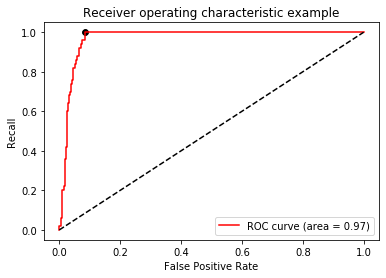

In [35]:
#我们可以在图像上来看看这个点在哪里
#把上述代码放入这段代码中：
plt.figure()
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

最佳阈值就这样选取出来了，由于现在我们是使用decision_function来画ROC曲线，所以我们选择出来的最佳阈值其实是最佳距离。如果我们使用的是概率，我们选取的最佳阈值就会使一个概率值了。只要我们让这个距离/概率以上的点，都为正类，让这个距离/概率以下的点都为负类，模型就是最好的：即能够捕捉出少数类，又能够尽量不误伤多数类，整体的精确性和对少数类的捕捉都得到了保证.

而从找出的最优阈值点来看，这个点，其实是图像上离左上角最近的点，离中间的虚线最远的点，也是ROC曲线的转折点。如果没有时间进行计算，或者横坐标比较清晰的时候，我们就可以观察转折点来找到我们的最佳阈值.

# 使用SVC时的其他考虑

## 3.1 SVC处理多分类问题：重要参数decision_function_shape

之前所有的SVM内容，全部是基于二分类的情况来说明的，因为支持向量机是天生二分类的模型。不过，它也可以做多分类，但是SVC在多分类情况上的推广，属于恶魔级别的难度，要从数学角度去理解几乎是不可能的，因为要研究透彻多分类状况下的SVC，就必须研究透彻多分类时所需要的决策边界个数，每个决策边界所需要的支持向量的个数，以及这些支持向量如何组合起来计算我们的拉格朗日乘数，要求我们必须对SMO或者梯度下降求解SVC的拉格朗日乘数的过程十分熟悉。这些内容推广到多分类之后，即便在线性可分的二维数据上都已经复杂，要再推广到非线性可分的高维情况，就远远超出了我们这个课程的要求